# Customer Personality Analysis

by: Anastiara Adina Restu

JCDS 1702 002

## Background

Sales and Marketing team wants to know about their sales summary for the last two years based on their marketing campaign data. They believe that their data can help them to identify their customers' purchases behavior and they want to get insights from there to plan their next marketing strategy.

## Problem Statements

To answer the sales and marketing team's problem, here are the points needed to be answered by the analysis:

- **Characteristics of customers who purchase products**
- **Characteristics of customers who do transaction through channels**
- **Relationship between Expenses and transaction channels**

## Data

This dataset contains informations about customers' education, marital status, income, amount of children or teens, amount of each products bought, transaction channels, and campaign offers for the last 2 years (2012-2014). There are 29 columns in marketing_campaign dataset :

**People**
* ID : Customer's unique identifier
* Year_Birth : Customer's birth year
* Education : Customer's education level
* Marital_Status : Customer's marital status
* Income : Customer's yearly household income
* Kidhome : Number of children in customer's household
* Teenhome : Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency : Number of days since customer's last purchase
* Complain : 1 if customer complained in the last 2 years, 0 otherwise.

**Products**
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts : Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

**Promotion**
* NumDealsPurchases : Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

**Channels**
* NumWebPurchases: Number of purchases made through the company’s web site.
* NumCatalogPurchases: Number of purchases made using a catalogue.
* NumStorePurchases: Number of purchases made directly in stores.
* NumWebVisitsMonth: Number of visits to company’s web site in the last month.

In [1]:
# Analytics libraries
import pandas as pd
import numpy as np

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

# other
import warnings
warnings.filterwarnings("ignore")

## Data Understanding and Data Cleaning

### Data Understanding
Before doing the analysis, we need to have understanding on the data itself. In this part, we will identify more informations about the data and the anomalies that later on we will handle in data cleaning part.

### Loading dataset

The very first thing to do is load the dataset to notebook using pandas library that I have imported earlier. Here are top 5 rows and bottom 5 rows of the dataset

In [2]:
df = pd.read_csv('marketing_campaign.csv',sep='\t', lineterminator='\r')
pd.set_option("display.max_columns",None)
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,\n5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,\n2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,\n4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,\n6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,\n5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2236,\n4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,\n7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,\n8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2239,\n9405,1954.0,PhD,Married,52869.0,1.0,1.0,15-10-2012,40.0,84.0,3.0,61.0,2.0,1.0,21.0,3.0,3.0,1.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
2240,\n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Get the information about amount of rows and columns, also data types and null values of columns

In [3]:
print(f'The amount of rows and columns in the df dataset are {df.shape}')
df.info()

The amount of rows and columns in the df dataset are (2241, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2241 entries, 0 to 2240
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2241 non-null   object 
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   float64
 6   Teenhome             2240 non-null   float64
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntWines             2240 non-null   float64
 10  MntFruits            2240 non-null   float64
 11  MntMeatProducts      2240 non-null   float64
 12  MntFishProducts      2240 non-null   float64
 13  MntSweetProducts     2240 non-null   float64
 14  MntGoldProds         224

Get the summary of descriptive statistics of df dataset

In [4]:
display(df.describe(),df.describe(include='object'))

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,ID,Education,Marital_Status,Dt_Customer
count,2241,2240,2240,2240
unique,2241,5,8,663
top,\n5524,Graduation,Married,31-08-2012
freq,1,1127,864,12


In [5]:
# check if there are some duplicated values
df.duplicated().sum()

0

Overall, we can see that:
* There are 2241 rows and 29 columns
* Dt_Customer data type has not been in datetime data type
* There are missing values in Income column and one customer's info (the last row). We will handle this later.
* There are no duplicated values in dataset
* The ID values are not written well. We will also handle this later.
* There are some categories that need to be more reduced (e.g Education, Marital_Status,number of kids)
* Z_CostContact and Z_Revenue have the same values respectively, so we can drop them.
* Income and Year_Birth have outliers based on the descriptive statistics. We will handle them later.
* Lastly, there are some data types are needed to be changed.

## Data Cleansing

In this section, we will doing data cleansing in order to get better data for our analysis.

1. Fix ID values

In [6]:
df['ID'] = df['ID'].replace('\n','').str.strip()
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957.0,Graduation,Single,58138.0,0.0,0.0,04-09-2012,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,2174,1954.0,Graduation,Single,46344.0,1.0,1.0,08-03-2014,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2,4141,1965.0,Graduation,Together,71613.0,0.0,0.0,21-08-2013,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
3,6182,1984.0,Graduation,Together,26646.0,1.0,0.0,10-02-2014,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
4,5324,1981.0,PhD,Married,58293.0,1.0,0.0,19-01-2014,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2236,4001,1946.0,PhD,Together,64014.0,2.0,1.0,10-06-2014,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,11.0,0.0
2237,7270,1981.0,Graduation,Divorced,56981.0,0.0,0.0,25-01-2014,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2238,8235,1956.0,Master,Together,69245.0,0.0,1.0,24-01-2014,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
2239,9405,1954.0,PhD,Married,52869.0,1.0,1.0,15-10-2012,40.0,84.0,3.0,61.0,2.0,1.0,21.0,3.0,3.0,1.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
2240,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Specified categorization for Education and Marital_Status column

In [7]:
# getting to know about unique values in Education and Marital_Status column
print(f"Unique values from Education are {df['Education'].unique()}")
print(f"Unique values from Marital_Status are {df['Marital_Status'].unique()}")

Unique values from Education are ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle' nan]
Unique values from Marital_Status are ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO'
 nan]


For Education column, we will reduce the categories into 2 categories.
* Postgraduate : PhD, Master, 2n Cycle
* Undergraduate : Graduation, Basic

For Marital_Status column, we will also reduce the categories into 3 categories
* Single : Single, Alone, Absurd, YOLO
* Married : Married, Together
* Divorced : Divorced, Widow

In [8]:
df['Education'] = df['Education'].replace({'PhD':'Postgraduate','Master':'Postgraduate','2n Cycle':'Postgraduate','Graduation':'Undergraduate','Basic':'Undergraduate'})
df['Marital_Status'] = df['Marital_Status'].replace({'Alone':'Single','Absurd':'Single','YOLO':'Single','Together':'Married','Widow':'Divorced'})

3. Detecting missing values

In [9]:
# Percentage of the missing value

def missing_data(df):
    total = df.isna().sum().sort_values(ascending=False)
    Percentage = (df.isna().sum()/df.isna().count()*100).sort_values(ascending=False)
    return pd.concat([total,Percentage],axis=1, keys=['Total','Percentage'])
missing_data(df).style.background_gradient(cmap='BuPu')

,Total,Percentage
Income,25,1.115573
MntGoldProds,1,0.044623
NumDealsPurchases,1,0.044623
Z_Revenue,1,0.044623
Z_CostContact,1,0.044623
Complain,1,0.044623
AcceptedCmp2,1,0.044623
AcceptedCmp1,1,0.044623
AcceptedCmp5,1,0.044623
AcceptedCmp4,1,0.044623


From the table above, it is seen that Income column has 25 missing values and each column has 1 missing values. To handle these missing values, there are several ways to do this:
1. drop all missing values
2. fill missing values with mean, median or mode value

for the needs of analysis later, we will fill the missing values of Income columns. To do that, we need to check if Income data is normal distributed or not to decide whether we want to fill the columns with mean or median value


''

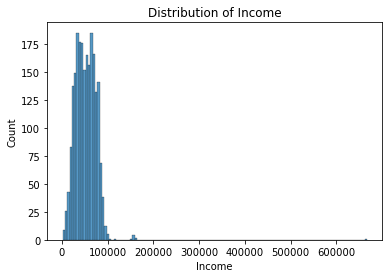

In [10]:
# check the distribution of Income data using histogram
sns.histplot(df['Income'])
plt.title('Distribution of Income')
;

From the histogram, it indicates that the distribution of income data is not normal. To ensure us, we will perform the normality test using D'Agostino and Pearson test

In [11]:
# check the normal distribution with normality tesy D'Agostino and Pearson test
from scipy.stats import normaltest
stat,pval = normaltest(df['Income'].dropna())

if pval < 0.05:
    print('The Distribution of Income data is not normal')
else:
    print('The The Distribution of Income data is not normal')

The Distribution of Income data is not normal


After performing histogram and normality test on Income data, it turns out that the distribution of Income data is not normal. So, the right value to fill the missing values of Income is median value based on Education and Marital_Status category because we believe that those two features are relevant to income.

In [12]:
# Finding out each median for each education and marital_status category
df.groupby(['Education','Marital_Status']).median()['Income']

Education      Marital_Status
Postgraduate   Divorced          52822.5
               Married           53376.0
               Single            49504.0
Undergraduate  Divorced          55599.0
               Married           50286.0
               Single            47415.0
Name: Income, dtype: float64

In [13]:
# fill in the NaN with median value
df['Income'] = df['Income'].fillna(df.groupby(['Education','Marital_Status'])['Income'].transform('median'))

''

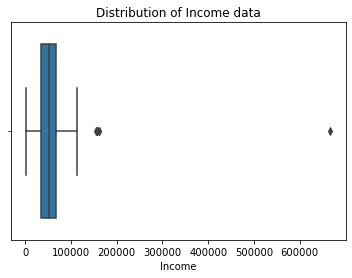

In [14]:
# check if Income has outliers from Boxplot
sns.boxplot(df['Income'])
plt.title('Distribution of Income data')
;

In [15]:
q1_income = df['Income'].quantile(q=0.25)
q3_income = df['Income'].quantile(q=0.75)

iqr = q3_income-q1_income

upper_bound_income = (iqr*1.5) + q3_income
lower_bound_income = (iqr*1.5) - q1_income
display(upper_bound_income,lower_bound_income)

117416.25

13587.75

In [16]:
# count the outliers that our Income data have
len_outliers = len(df[(df['Income']>=upper_bound_income) | (df['Income']<=lower_bound_income)])
percentage_outliers = len_outliers/len(df)*100
print(f'There are {len_outliers} outliers of income data, with {percentage_outliers} % of all data')


There are 48 outliers of income data, with 2.14190093708166 % of all data


To get more understanding about our majority of customers, we decide to remove the outliers.

In [17]:
# filter the Income <= upper_bound_income and >= lower_bound_income
df=df[(df['Income'] <= upper_bound_income) & (df['Income']>=lower_bound_income)]
len(df)

2192

In [18]:
df['Income'].describe()

count      2192.000000
mean      52416.974224
std       19924.679572
min       13624.000000
25%       36136.000000
50%       51844.500000
75%       68468.250000
max      113734.000000
Name: Income, dtype: float64

Now, our Income data ranges from 13624 USD to 113734 USD

In [19]:
# cleaning up the NaN row
df.dropna(how='any',inplace=True)

In [20]:
# change the data type of datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [21]:
# drop Z_CostContact and Z_Revenue because those columns have the same values and won't give impact to the analysis
df = df.drop(columns=['Z_CostContact','Z_Revenue'])

## Modification on Cleaned Data

After we do data cleaning, we will modify columns that we will use for analysis. 

* Extract the Age customer by the "Year_Birth" to indicate the birth year of the respective person.
* Create Age Group to categorize customers based on their age
* Create another column "Expenses" to indicate the amount spent by the customer in various categories over the span of two years 
* Create another column "Children" to indicate total kids and teens in a household
* Create another column NumAllPurchases to indicate the frequency of customers buy the products in every channel over 2 years.
* Change some data types




### Age of customers

In [22]:
# Firstly, we need to check when is the last date of this dataset
df['Dt_Customer'].max()


Timestamp('2014-12-06 00:00:00')

In [84]:
df['Dt_Customer'].min()

Timestamp('2012-01-08 00:00:00')

So, we assume that the data was collected on 2014-12-07 and we consider that to count the age of customers is counted from year 2014.

In [23]:
# add Age column
df['Age'] = 2014 - df['Year_Birth']
age = df.pop('Age')
df.insert(2,'Age',age)

Check on Age data

In [24]:
df['Age'].describe()

count    2192.000000
mean       45.344434
std        11.963907
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max       121.000000
Name: Age, dtype: float64

From the data above, we better look for the outliers and remove them because it's not logical to have customer in age 121...

In [25]:
# check outliers for Age column
# determine Q1 and Q3
Q1_age = df['Age'].quantile(q=0.25)
Q3_age = df['Age'].quantile(q=0.75)

# find IQR
iqr = Q3_age - Q1_age

# find upper bound and lower bound
upper_bound_age = (iqr*1.5) + Q3_age
lower_bound_age = (iqr*1.5) - Q1_age

# display(lower_bound_age,upper_bound_age)
df[df['Age'] >= upper_bound_age]


,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,7829,1900.0,114.0,Postgraduate,Divorced,36640.0,1.0,0.0,2013-09-26,99.0,15.0,6.0,8.0,7.0,4.0,25.0,1.0,2.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
239,11004,1893.0,121.0,Postgraduate,Single,60182.0,0.0,1.0,2014-05-17,23.0,8.0,0.0,5.0,7.0,0.0,2.0,1.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
339,1150,1899.0,115.0,Postgraduate,Married,83532.0,0.0,0.0,2013-09-26,36.0,755.0,144.0,562.0,104.0,64.0,224.0,1.0,4.0,6.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


There are 3 outliers of Age data, so we will drop these data from dataset

In [26]:
df =df[(df['Age']<=upper_bound_age) & (df['Age']>=lower_bound_age)]
# len(df)

In [27]:
df['Age'].describe()

count    2189.000000
mean       45.246688
std        11.676215
min        18.000000
25%        37.000000
50%        44.000000
75%        55.000000
max        74.000000
Name: Age, dtype: float64

So now, our customers' age ranges from 18 to 74 years old.

Age group

We also want to categorize customers based on age group into 4 groups:

1. Gen Z = 18 - 25 years old
2. Millenials = 26 - 41 years old
3. Gen X = 42 - 57 years old
4. Boomers = > 57 years old

In [28]:
def age_group(x):
    if x >= 18 and x<=25:
        return 'Gen Z'
    elif x >= 26 and x<=41:
        return 'Millenials'
    elif x >= 42 and x<=57:
        return 'Gen X'
    else:
        return 'Boomers'
age_group_final=df['Age'].apply(age_group)
df.insert(3,'Age_group',age_group_final)

### Children

In [29]:
# Add column Children which values are total from Kidhome and Teenhome
children = df['Kidhome']+df['Teenhome']
df.insert(5,'Children',children)
df.head()

,ID,Year_Birth,Age,Age_group,Education,Children,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,57.0,Gen X,Undergraduate,0.0,Single,58138.0,0.0,0.0,2012-04-09,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174,1954.0,60.0,Boomers,Undergraduate,2.0,Single,46344.0,1.0,1.0,2014-08-03,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141,1965.0,49.0,Gen X,Undergraduate,0.0,Married,71613.0,0.0,0.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182,1984.0,30.0,Millenials,Undergraduate,1.0,Married,26646.0,1.0,0.0,2014-10-02,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324,1981.0,33.0,Millenials,Postgraduate,1.0,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Expenses

In [30]:
# add column "Expenses" which is an amount of customers' spending in products
expenses = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']
df.insert(18,'Expenses',expenses)

### NumAllPurchases

In [31]:
# Add column "NumAllPurchases" which is total of frequency of customers' transaction channels
NumAllPurchases = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']
df.insert(22,'NumAllPurchases',NumAllPurchases)
df.head()

,ID,Year_Birth,Age,Age_group,Education,Children,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Expenses,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumAllPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957.0,57.0,Gen X,Undergraduate,0.0,Single,58138.0,0.0,0.0,2012-04-09,58.0,635.0,88.0,546.0,172.0,88.0,88.0,1617.0,3.0,8.0,10.0,22.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2174,1954.0,60.0,Boomers,Undergraduate,2.0,Single,46344.0,1.0,1.0,2014-08-03,38.0,11.0,1.0,6.0,2.0,1.0,6.0,27.0,2.0,1.0,1.0,4.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4141,1965.0,49.0,Gen X,Undergraduate,0.0,Married,71613.0,0.0,0.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,776.0,1.0,8.0,2.0,20.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6182,1984.0,30.0,Millenials,Undergraduate,1.0,Married,26646.0,1.0,0.0,2014-10-02,26.0,11.0,4.0,20.0,10.0,3.0,5.0,53.0,2.0,2.0,0.0,6.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5324,1981.0,33.0,Millenials,Postgraduate,1.0,Married,58293.0,1.0,0.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,422.0,5.0,5.0,3.0,14.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# change Age and Children data type into "integer"
df['Age']=df['Age'].astype('int')
df['Children']=df['Children'].astype('int')

### Drop unnecessary columns

In [33]:
cols_drop = ['Year_Birth','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']
df=df.drop(columns=cols_drop).reset_index()
df.columns

Index(['index', 'ID', 'Age', 'Age_group', 'Education', 'Children',
       'Marital_Status', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Expenses', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumAllPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth'],
      dtype='object')

In [34]:
# save data to csv
df.to_csv('cleaned_marketing_data.csv')

In [35]:
print(f'So, after doing data cleaning and modification, we have {df.shape[0]} rows and {df.shape[1]} columns in our dataset')

So, after doing data cleaning and modification, we have 2189 rows and 23 columns in our dataset


# Data Analysis

## Characteristics of customers who purchase products

To get insights about who are customers and what products they have purchased, we will divide our customers into four categories:

1. Education
2. Marital Status
3. Number of Kids
4. Age Group

From those categories, we will dig more on their income, expenses, and product purchases.

### Observations of customers demographics

In this section, we will observe the demographics of our customers based on 
- education
- marital status
- number of kids
- Age Group 

to know more about our customers' profile. As a reminder, we have 2.189 customers during 2012 - 2014.

### Education

In [36]:
df_education = df.groupby(['Education']).count()['ID'].reset_index()
df_education

,Education,ID
0,Postgraduate,1034
1,Undergraduate,1155


In [37]:
fig = px.pie(df_education,
            names='Education',
            values='ID',
            title="Percentage of Customers' Education")
fig.show()

From the pie chart above, we know that 52.8% of our customers' education are Undergraduate and 47.2% are Postgraduate

### Marital Status category

In [38]:
df_marital = df.groupby(['Marital_Status']).count()['ID'].reset_index()
# df['percentage of customers'] = df['ID']/len(df)
df_marital['percentage of customer'] = round(df_marital['ID']/len(df)*100,1)
df_marital

,Marital_Status,ID,percentage of customer
0,Divorced,299,13.7
1,Married,1416,64.7
2,Single,474,21.7


In [39]:
fig = px.bar(
    df_marital,
    x='Marital_Status',
    y='percentage of customer',
    title="Number of Customer by Marital Status"
)

fig.show()

From the graph above, we get the information that based on marital status, married customers has the highest percentage of all categories with 64.7%. The second is single customers wtih 21.7% and the last one is divorced customers with 13.7%

### Age group

note : as a reminder, we have divided our customers based on age generations:

1. Gen Z = 18 - 25 years old
2. Millenials = 26 - 41 years old
3. Gen X = 42 - 57 years old
4. Boomers = > 57 years old

In [40]:
df_age_group = df.groupby(['Age_group']).count()['ID'].reset_index()
# df['percentage of customers'] = df['ID']/len(df)
df_age_group['percentage of customer'] = round(df_age_group['ID']/len(df)*100,1)
df_age_group

,Age_group,ID,percentage of customer
0,Boomers,416,19.0
1,Gen X,887,40.5
2,Gen Z,84,3.8
3,Millenials,802,36.6


''

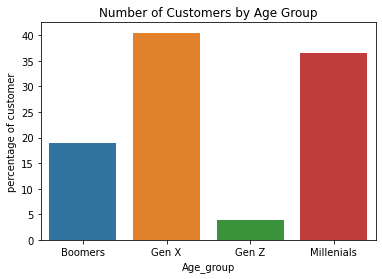

In [41]:
sns.barplot(data=df_age_group,x='Age_group', y='percentage of customer')
plt.title('Number of Customers by Age Group')
;

Based on the graph above, most of our customers come from Gen X generation (42 - 57 years old) and Gen Z is the least.

### Number of kids

In this category, we devided out customers based on how many kids/teens that they have.

In [42]:
df_kids = df.groupby(['Children']).count()['ID'].reset_index()
df_kids['Children']=df_kids['Children'].astype('object')
df_kids['percentage of customers'] = round(df_kids['ID']/len(df)*100,1)
df_kids.rename(columns={'Children':'Number of Kids'},inplace=True)
df_kids

,Number of Kids,ID,percentage of customers
0,0,621,28.4
1,1,1101,50.3
2,2,414,18.9
3,3,53,2.4


''

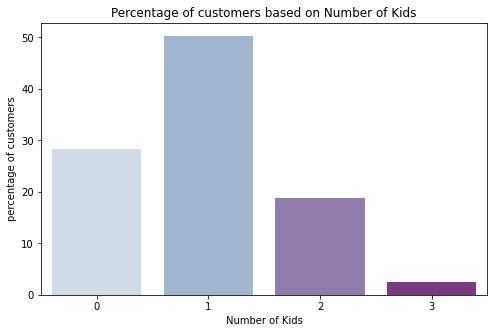

In [43]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_kids,x='Number of Kids', y='percentage of customers',palette='BuPu')
plt.title('Percentage of customers based on Number of Kids')
;

Based on the graph above, customers who shop in our company is customers with one kid.

### Observation Results

Based on the previous results, we can conclude that most of our customers are **undergraduate**, **married**, **42-57 years old (Gen X)**, and **have one child**. We also notice that Gen Z and divorced customers are the least customers

Later, we will do more analysis on their income, expenses, product purchase, and transaction purchase behaviour to get more insights about them.

## Observations of Customers' Income

In this section, we will do analysis on customers' income based on:
- education
- marital status
- number of kids
- Age Group 

We do this analysis because we want to know how much our customers earn annually

note : the Income data is in USD


### Education

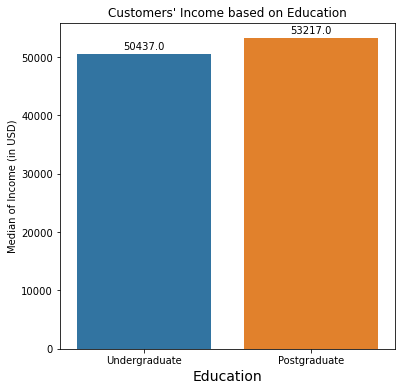

In [44]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Education',y='Income',ci=0,estimator=np.median)
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Education',size=14)
plt.ylabel('Median of Income (in USD)')
plt.title("Customers' Income based on Education")
plt.show()

From the graphs above, we can see that the customers who have higher income are Postgraduate customers, with median 53217 USD than undergraduate customers with 50437 USD

### Marital Status

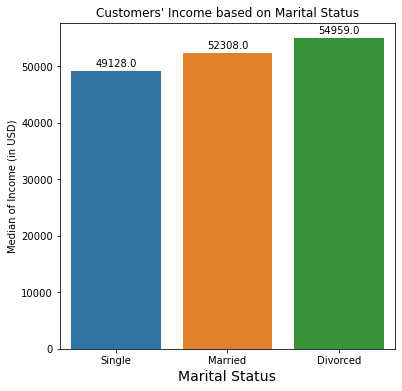

In [45]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Marital_Status',y='Income',ci=0,estimator=np.median)
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Marital Status',size=14)
plt.ylabel('Median of Income (in USD)')
plt.title("Customers' Income based on Marital Status")
plt.show()

From the graphs above, we can see that the customers who have the highest income to the lowest income are:
1. Divorced customers, with median of income 54959 USD
2. Married customers, with median of income 52308 USD
3. Single customers, with median of income 49128 USD

### Number of Kids

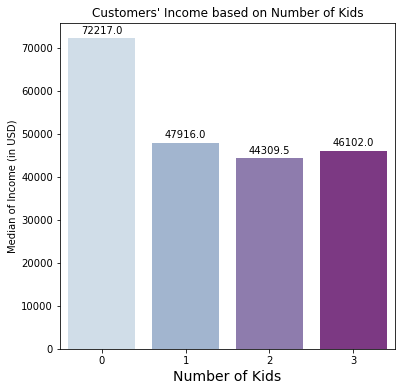

In [46]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Children',y='Income',ci=0,estimator=np.median,palette='BuPu')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Number of Kids',size=14)
plt.ylabel('Median of Income (in USD)')
plt.title("Customers' Income based on Number of Kids")
plt.show()

From the graphs above, we can see that the customers who have the highest income to the lowest income are:
1. No kids customers, with median of income USD 72217
2. customers with 1 kid/teen, with median of income USD 47916
3. customers with 3 kids/teens, with median of income USD 46102
4. Customer with 2 kids/teens, with median of income USD 44309 

### Age Group

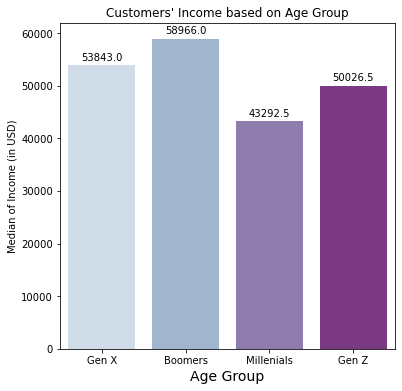

In [47]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Age_group',y='Income',ci=0,estimator=np.median,palette='BuPu')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Age Group',size=14)
plt.ylabel('Median of Income (in USD)')
plt.title("Customers' Income based on Age Group")
plt.show()

From the graphs above, we can see that the customers who have the highest income to the lowest income are:
1. Boomers customers, with median of income USD 58966
2. Gen X customers, with median of income USD 53843
3. Gen Z customers, with median of income USD 50025.5
4. Millenials customers, with median of income USD 43292.5

### Observation results
Based on Income analysis, we can tell that Postgraduate, divorced customers, no kids customers, and Boomers customers could be the main target of our sales, since they have the highest income. However, we need to check more on their expenses.

## Observations of Customers' Expenses

### Age Group

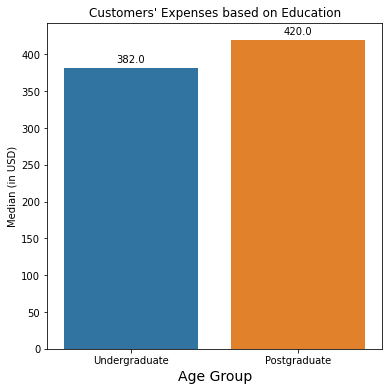

In [48]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Education',y='Expenses',ci=0,estimator=np.median)
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Age Group',size=14)
plt.ylabel('Median (in USD)')
plt.title("Customers' Expenses based on Education")
plt.show()

From the graph above, we find out that Postgraduate spend more than undergraduate customers.

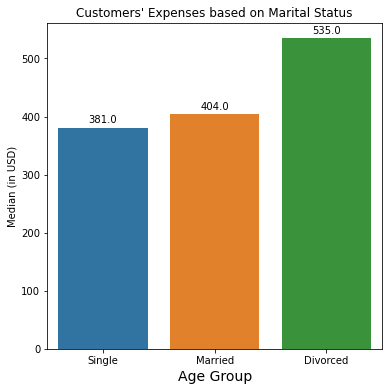

In [49]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Marital_Status',y='Expenses',ci=0,estimator=np.median)
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Age Group',size=14)
plt.ylabel('Median (in USD)')
plt.title("Customers' Expenses based on Marital Status")
plt.show()

From the graph above, we find out that Divorced customers spend the most and single customers spend the least.

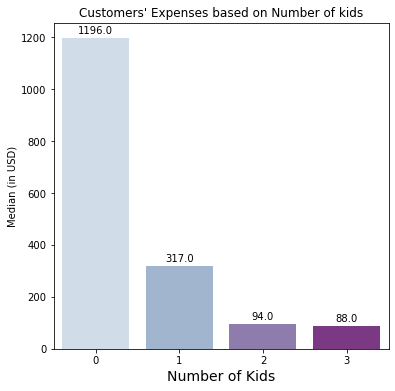

In [50]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Children',y='Expenses',ci=0,estimator=np.median,palette='BuPu')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Number of Kids',size=14)
plt.ylabel('Median (in USD)')
plt.title("Customers' Expenses based on Number of kids")
plt.show()

From the graph above, we find out that customers with no kids spend the most than other categories.

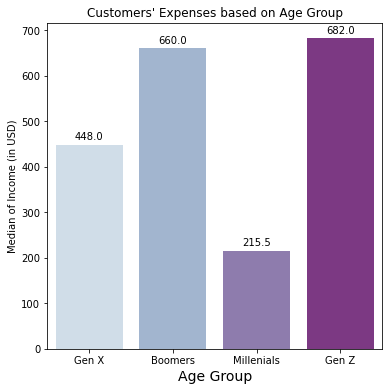

In [51]:
plt.figure(figsize=(6,6))
ax = sns.barplot(data=df, x='Age_group',y='Expenses',ci=0,estimator=np.median,palette='BuPu')
for bar in ax.patches:
    ax.annotate(format(bar.get_height()),
                (bar.get_x()+bar.get_width()/2,
                bar.get_height()),
                ha='center',
                va='center',
                size=10,
                xytext=(0,8),
                textcoords='offset points')
plt.xlabel('Age Group',size=14)
plt.ylabel('Median of Income (in USD)')
plt.title("Customers' Expenses based on Age Group")
plt.show()

From the plot above, Gen Z spend the most in our company, while Millenials spend the least.

### Observation results
Based on Expenses analysis, we can tell that Postgraduate, divorced customers, no kids customers, and Gen Z customers also could be the main target of our sales, since they have the highest expenses. However, we need to check more on their expenses on each product so we can figure out in what product that we can target them to.

## Observations of Customers' Product Purchase
Before we observe more on customers' product purchase, we have to take a look on products purchases data distributions so we can decide if we can use mean or median on later analysis



Text(0.5, 1.0, 'Gold')

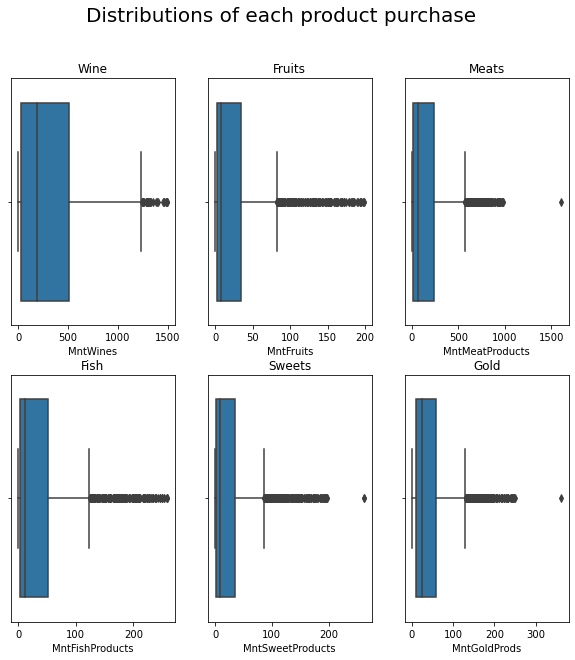

In [52]:
fig, axes = plt.subplots(2,3, figsize=(10,10))

fig.suptitle("Distributions of each product purchase",fontsize=20)


sns.boxplot(df['MntWines'],ax=axes[0,0])
axes[0,0].set_title('Wine')

sns.boxplot(df['MntFruits'],ax=axes[0,1])
axes[0,1].set_title('Fruits')

sns.boxplot(df['MntMeatProducts'],ax=axes[0,2])
axes[0,2].set_title('Meats')

sns.boxplot(df['MntFishProducts'],ax=axes[1,0])
axes[1,0].set_title('Fish')

sns.boxplot(df['MntSweetProducts'],ax=axes[1,1])
axes[1,1].set_title('Sweets')

sns.boxplot(df['MntGoldProds'],ax=axes[1,2])
axes[1,2].set_title('Gold')

After looking at our each products data distributions, we decide to use median as our main representation of data becase all data are not normal distributed. Next, we will also look at total expenses of each product and their median to get more information about what product is most spend by our customers.

In [53]:
df_all_prod=df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum().sort_values(ascending=False)

In [54]:
df_all_prod = pd.DataFrame(df_all_prod).reset_index()

In [55]:
df_all_prod.rename(columns={'index':'Products',0:'Total'},inplace=True)

In [56]:
df_all_prod['Products'].replace({'MntWines':'Wines',
                                'MntFruits':'Fruits',
                                'MntMeatProducts':'Meat',
                                'MntFishProducts':'Fish',
                                'MntSweetProducts':'Sweets',
                                'MntGoldProds':'Gold'},inplace=True)

In [57]:
df_all_prod_med = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].median().sort_values(ascending=False).reset_index()

In [58]:
df_all_prod_med.rename(columns={'index':'Products',0:'Median'},inplace=True)
df_all_prod_med['Products'].replace({'MntWines':'Wines',
                                'MntFruits':'Fruits',
                                'MntMeatProducts':'Meat',
                                'MntFishProducts':'Fish',
                                'MntSweetProducts':'Sweets',
                                'MntGoldProds':'Gold'},inplace=True)

In [59]:
df_all_prod_med

,Products,Median
0,Wines,184.0
1,Meat,69.0
2,Gold,25.0
3,Fish,12.0
4,Sweets,9.0
5,Fruits,8.0


In [60]:
df_all_prod

,Products,Total
0,Wines,679273.0
1,Meat,366240.0
2,Gold,96921.0
3,Fish,83684.0
4,Sweets,60340.0
5,Fruits,58483.0


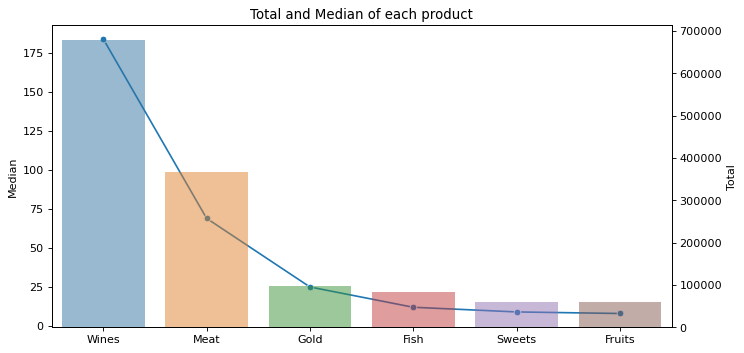

In [61]:
ax1= sns.set_style(style=None, rc=None)

fig,ax1= plt.subplots(figsize=(10,5),dpi=80)


sns.lineplot(data=df_all_prod_med['Median'],marker='o',ax=ax1)
ax2=ax1.twinx()
sns.barplot(data=df_all_prod,x='Products',y='Total',alpha=0.5,ax=ax2)

plt.title('Total and Median of each product')
plt.show()

From the graph above, it is shown that Wines and Meat are the most bought by our customers and the least bought customer is Fruits. From the data, we can on Wine and Meat sales than other products. To get more insights about our products sales, we need analyze our customers product purchase based on Education, Marital Status, Number of Kids, and Age group.

### Education

In [62]:
df_product_education = df.groupby('Education').median()[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].reset_index()
df_product_education

,Education,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Postgraduate,202.0,7.0,68.0,10.0,6.5,20.0
1,Undergraduate,173.0,10.0,71.0,15.0,12.0,29.0


In [89]:
df_product_education.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)

In [100]:
df_product_education[['Wines','Fruits','Meat','Fish','Sweets','Gold']]=df_product_education[['Wines','Fruits','Meat','Fish','Sweets','Gold']].astype('int')

In [102]:
df_product_education.style.background_gradient(cmap='BuPu')

,Education,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Postgraduate,202,7,68,10,6,20
1,Undergraduate,173,10,71,15,12,29


<Figure size 1800x1080 with 0 Axes>

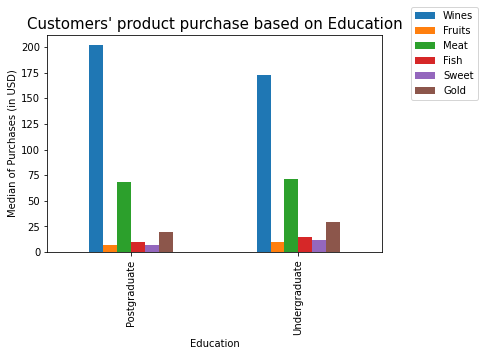

In [ ]:
plt.figure(figsize=(25,15))

ax = df_product_education.plot(x='Education',y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],kind='bar')
plt.ylabel('Median of Purchases (in USD)')
plt.title("Customers' product purchase based on Education",fontsize=15)
plt.legend(['Wines','Fruits','Meat','Fish','Sweet','Gold'],bbox_to_anchor=(1.3, 1.15))

plt.show()

Based on the data, we know that wines is the most bought product by postgraduate and undergraduate customers. Undergraduate customers buy has the higher purchase of each product except Wine. We also notice that Fruits is the least bought by postgraduate and undergraduate customers.


### Marital Status

In [64]:
df_product_status = df.groupby('Marital_Status').median()[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].reset_index()
df_product_status

,Marital_Status,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Divorced,229.0,10.0,81.0,13.0,9.0,29.0
1,Married,183.5,8.0,68.0,12.0,8.0,23.0
2,Single,161.0,9.0,68.0,13.0,9.0,27.0


In [91]:
df_product_status.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)
# df_product_status.style.background_gradient(cmap='BuPu')

,Marital_Status,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Divorced,229.000000,10.000000,81.000000,13.000000,9.000000,29.000000
1,Married,183.500000,8.000000,68.000000,12.000000,8.000000,23.000000
2,Single,161.000000,9.000000,68.000000,13.000000,9.000000,27.000000


In [105]:
df_product_status[['Wines','Fruits','Meat','Fish','Sweets','Gold']]=df_product_status[['Wines','Fruits','Meat','Fish','Sweets','Gold']].astype('int')

In [106]:
df_product_status.style.background_gradient(cmap='BuPu')

,Marital_Status,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Divorced,229,10,81,13,9,29
1,Married,183,8,68,12,8,23
2,Single,161,9,68,13,9,27


<Figure size 1800x1080 with 0 Axes>

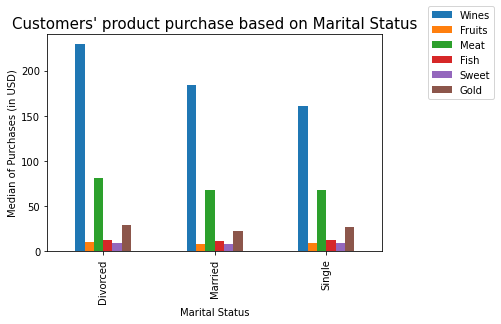

In [65]:
plt.figure(figsize=(25,15))

df_product_status.plot(x='Marital_Status',y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Median of Purchases (in USD)')
plt.title("Customers' product purchase based on Marital Status",fontsize=15)
plt.legend(['Wines','Fruits','Meat','Fish','Sweet','Gold'],bbox_to_anchor=(1.35, 1.15))
plt.show()

Based on the data, we know that divorced customers spend the most in our store. It is also interesting that many single customers buy Gold Products than married customers. Still, fruits is the least bought in this category.

### Number of Children

In [66]:
df_product_kids = df.groupby('Children').median()[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].reset_index()
df_product_kids

,Children,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,0,464.0,34.0,374.0,60.0,37.0,43.0
1,1,157.0,6.0,53.0,10.0,7.0,22.0
2,2,51.0,2.0,21.0,3.0,2.0,13.0
3,3,33.0,1.0,22.0,3.0,1.0,9.0


In [92]:
df_product_kids.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)
# df_product_kids.style.background_gradient(cmap='BuPu')

,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,0,464.000000,34.000000,374.000000,60.000000,37.000000,43.000000
1,1,157.000000,6.000000,53.000000,10.000000,7.000000,22.000000
2,2,51.000000,2.000000,21.000000,3.000000,2.000000,13.000000
3,3,33.000000,1.000000,22.000000,3.000000,1.000000,9.000000


In [111]:
df_product_kids['Children']=df_product_kids['Children'].astype('str')

In [112]:
df_product_kids.style.background_gradient(cmap='BuPu')

,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,0,464,34,374,60,37,43
1,1,157,6,53,10,7,22
2,2,51,2,21,3,2,13
3,3,33,1,22,3,1,9


<Figure size 1800x1080 with 0 Axes>

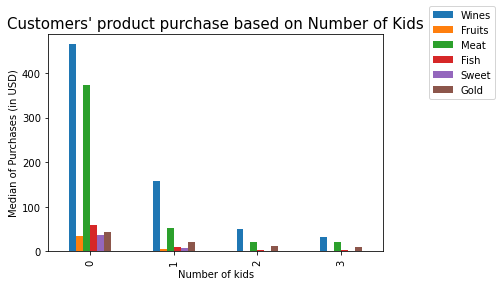

In [67]:
plt.figure(figsize=(25,15))

df_product_kids.plot(x='Children',y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],kind='bar')
plt.xlabel('Number of kids')
plt.ylabel('Median of Purchases (in USD)')
plt.title("Customers' product purchase based on Number of Kids",fontsize=15)
plt.legend(['Wines','Fruits','Meat','Fish','Sweet','Gold'],bbox_to_anchor=(1.35, 1.15))
plt.show()

Based on the data, we know that most of no kids customers spend the most in every product. We also notice that customers with 2 or 3 kids don't spend a lot of money on sweet products.

### Age Group

In [68]:
df_product_age = df.groupby('Age_group').median()[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].reset_index()
df_product_age

,Age_group,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Boomers,320.0,13.0,111.0,19.0,11.0,33.0
1,Gen X,219.0,9.0,69.0,12.0,8.0,26.0
2,Gen Z,187.5,12.0,125.0,23.0,20.5,33.0
3,Millenials,79.5,7.0,49.0,11.0,8.0,20.0


In [93]:
df_product_age.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'},inplace=True)
df_product_age.style.background_gradient(cmap='BuPu')

,Age_group,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Boomers,320.000000,13.000000,111.000000,19.000000,11.000000,33.000000
1,Gen X,219.000000,9.000000,69.000000,12.000000,8.000000,26.000000
2,Gen Z,187.500000,12.000000,125.000000,23.000000,20.500000,33.000000
3,Millenials,79.500000,7.000000,49.000000,11.000000,8.000000,20.000000


In [113]:
df_product_age[['Wines','Fruits','Meat','Fish','Sweets','Gold']]=df_product_age[['Wines','Fruits','Meat','Fish','Sweets','Gold']].astype('int')

In [114]:
df_product_age.style.background_gradient(cmap='BuPu')

,Age_group,Wines,Fruits,Meat,Fish,Sweets,Gold
0,Boomers,320,13,111,19,11,33
1,Gen X,219,9,69,12,8,26
2,Gen Z,187,12,125,23,20,33
3,Millenials,79,7,49,11,8,20


<Figure size 1800x1080 with 0 Axes>

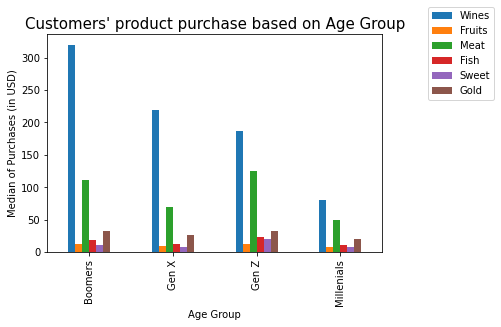

In [69]:
plt.figure(figsize=(25,15))

df_product_age.plot(x='Age_group',y=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds'],kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Median of Purchases (in USD)')
plt.title("Customers' product purchase based on Age Group",fontsize=15)
plt.legend(['Wines','Fruits','Meat','Fish','Sweet','Gold'],bbox_to_anchor=(1.35, 1.15))
plt.show()

Based on the data, Boomers ( 57 years old above ) customers spend the most on Wine products, while Gen Z customers spend the most on fish, meat and sweet products. Gold is also many bought by Gen Z and boomers customers.
The millenials customers spend the least in every products.

### Observation results:
1. The customers who buy wines most are postgraduate, boomers, no kids, and divorced customers.
3. Sweets products are still dominatedly purchase by customers who are Gen Z customers.
4. Gold product is most bought by divorced customers, undergraduate customers, boomers, and Gen Z customers
5. Millenials has the lowest expenses of every products, eventough they are the second highest amount of our customers
6. Meat product is most bought by no kids and Gen Z customers.
7. Fruits is the least bought by all customers


### Recommendations:
1. We can target wine to our postgraduate, boomers customer, no kids, and divorced customers 
2. We also can target all products except wine to our undergraduate and single customers.
3. We can increase gold sales on customers with kids, divorced customers, Gen Z, and boomers customers.
4. We can target Gen Z customers by selling more meat and sweets.
5. If we want to increase fruit sales, we need to do some quality check to see if we have provided the best fruit quality or not
6. We need to survey our Millenials customers why their income and expenses is lower than other generations, so we can take an approach to them since they are the second largest majority of our customers

## Observations of customers' Transaction Channels

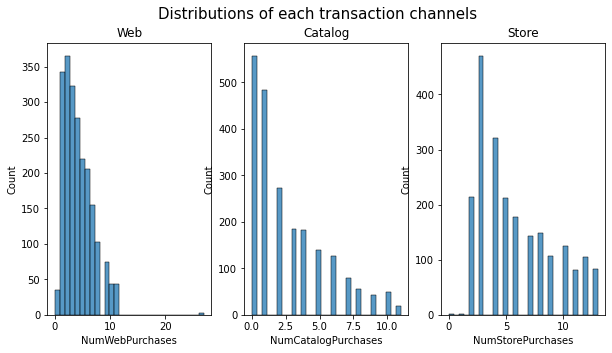

In [70]:
fig, axes = plt.subplots(1,3, figsize=(10,5))

fig.suptitle("Distributions of each transaction channels",fontsize=15)


sns.histplot(df['NumWebPurchases'],ax=axes[0],bins=30)
axes[0].set_title('Web')

sns.histplot(df['NumCatalogPurchases'],ax=axes[1],bins=30)
axes[1].set_title('Catalog')

sns.histplot(df['NumStorePurchases'],ax=axes[2],bins=30)
axes[2].set_title('Store')

plt.show()

From the histograms plot above, we can imply that all the transactions channels data are not normal distributions. So, we will use median as our estimator and analyze every customers catagory

### Education

In [71]:
df_purchase_education = df.groupby('Education').median()[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].reset_index()
df_purchase_education

,Education,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Postgraduate,4.0,2.0,5.0
1,Undergraduate,4.0,2.0,5.0


<Figure size 1800x720 with 0 Axes>

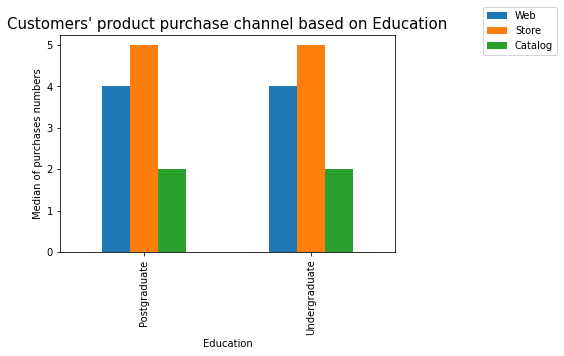

In [72]:
plt.figure(figsize=(25,10))

df_purchase_education.plot(x='Education',y=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'],kind='bar')
plt.title("Customers' product purchase channel based on Education",fontsize=15)
plt.ylabel('Median of purchases numbers')
plt.legend(['Web','Store','Catalog'],bbox_to_anchor =(1.5, 1.15))

plt.show()

### Marital Status

In [73]:
df_purchase_marital = df.groupby('Marital_Status').median()[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].reset_index()
df_purchase_marital

,Marital_Status,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Divorced,4.0,2.0,5.0
1,Married,4.0,2.0,5.0
2,Single,3.0,2.0,5.0


<Figure size 1800x720 with 0 Axes>

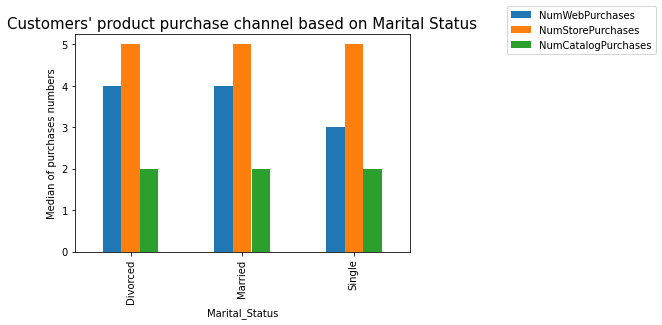

In [74]:
plt.figure(figsize=(25,10))

df_purchase_marital.plot(x='Marital_Status',y=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'],kind='bar')
plt.title("Customers' product purchase channel based on Marital Status",fontsize=15)
plt.ylabel('Median of purchases numbers')
plt.legend(bbox_to_anchor =(1.75, 1.15))

plt.show()

### Number of Children

In [75]:
df_purchase_children = df.groupby('Children').median()[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].reset_index()

<Figure size 1800x720 with 0 Axes>

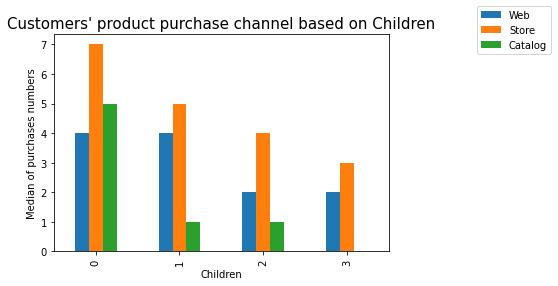

In [76]:
plt.figure(figsize=(25,10))

df_purchase_children.plot(x='Children',y=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'],kind='bar')
plt.title("Customers' product purchase channel based on Children",fontsize=15)
plt.ylabel('Median of purchases numbers')
plt.legend(['Web','Store','Catalog'],bbox_to_anchor =(1.5, 1.15))

plt.show()

### Age Group

In [77]:
df_purchase_age = df.groupby('Age_group').median()[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].reset_index()

df_purchase_age

,Age_group,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,Boomers,4.0,3.0,6.0
1,Gen X,4.0,2.0,5.0
2,Gen Z,3.0,2.5,5.0
3,Millenials,3.0,1.0,4.0


<Figure size 1800x720 with 0 Axes>

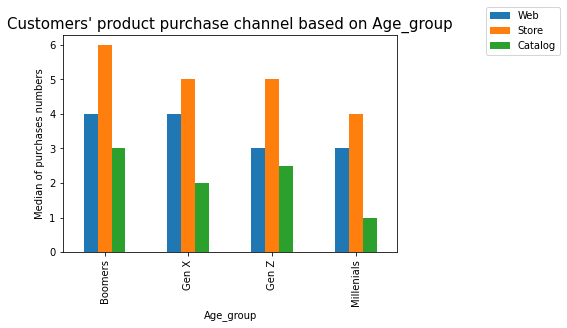

In [78]:
plt.figure(figsize=(25,10))

df_purchase_age.plot(x='Age_group',y=['NumWebPurchases','NumStorePurchases','NumCatalogPurchases'],kind='bar')
plt.title("Customers' product purchase channel based on Age_group",fontsize=15)
plt.ylabel('Median of purchases numbers')
plt.legend(['Web','Store','Catalog'],bbox_to_anchor =(1.5, 1.15))

plt.show()

`Observation results:
1. Most customers like to go shopping in Store
2. Catalog channel is least favorite for customers based on every category.
3. Besides store channel, web channel is also second favorite channel for every category of customers

Recommendations:
1. We can improve sales on store channel, because our customers tend to purchase products from here
2. It is needed more observations why catalog channel is the least favorite channel (e.g doing some survey to customers)
3. Web channel could be the next most favorite channel in the future, so we can also develop our website channel as well.

## Correlation between total product sales and transactions channel

to check if total product sales/customers' expenses and transactions channel are correlated, we must perform the correlation test. Here, we use **spearman correlation test** because we have noticed that the distribution of the transcations channel ('NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases') are not normal. 

In [79]:
df_corr_purchase = df[['Expenses','NumWebPurchases', 'NumCatalogPurchases','NumStorePurchases']]

In [80]:
df_corr_purchase.corr(method='spearman')[['Expenses']]

,Expenses
Expenses,1.000000
NumWebPurchases,0.728618
NumCatalogPurchases,0.891455
NumStorePurchases,0.810606


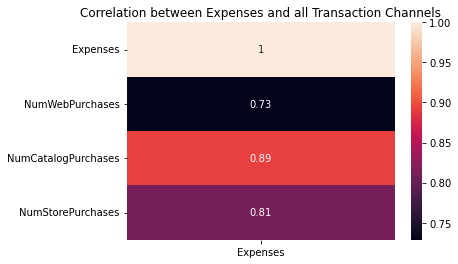

In [81]:
sns.heatmap(df_corr_purchase.corr(method='spearman')[['Expenses']],annot=True)
plt.title('Correlation between Expenses and all Transaction Channels')
plt.show()

From the plot above, it is shown that expenses and transaction channels have strong relationships, especially NumCatalogPurchases and Expenses. So, if we want our customers to shop more with us, we better improve our all transaction channels to get better sales number in every product by giving discount and better facilitation to satisfy our customers.

## Conclusion

To summarize our analysis, here are the things that we should notice :

**Characteristics of customers who purchase products**

1. Postgraduate customers has the highest income, however, they spend money most on Wine. So, we can target them to sell more various of Wine than other products. We can also target the divorced customers to buy Wine. 
2. Undergraduate customers has the highest expenses on every product except Wine. So, we can target them to sell our product except Wine.
3. There is a chance Gold can help to increase sales since its purchasing is dominated by divorced customers, no kids customers, boomers, and  Gen Z customers
4. We can also target the Gen Z customers to shop with us more since their expenses is the highest among all the age groups.
5. We can target meat and sweets to our Gen Z customers
6. If we want to target our millennial customers, we have to survey them why their income and expenses are the lowest.
7. If we want to increase fruit sales, we need to do some quality check on fruits to see if we have provided the best fruit quality or not

**Characteristics of customers who do transaction through channels**

1. Most of customers purchase products in store. So, we can improve our stores to increase the sales.
2. Web channel is in the second favorite for customers to shop. If we can improve the web channel too, it might boost the sales.
3. Catalog is the least favorite for customers to shop. 

**Relationship between Expenses and total sales amount/customers' expenses**

After performing spearman correlation test on Expenses and transaction channels, it is shown that they are strong corelated. So, we have to improve our transaction channels to get better sales number in every product.

## Future Analysis

1. We can do clustering based on customers' income and expenses, so we can have more understanding about our customers.
2. We can also analyse on customers' engaged days and its relationship with their number of purchases from each channel.
